# U.S. Medical Insurance Costs

Using the data presented in insurance.csv, my aim was to look at the different charge amounts for each customer, and find out if there were any particular rate increases or decreases based on age, sex, BMI, number of children, whether they smoked, and what region they were from.

### Import Libraries

In [191]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

### Data Organization 

- I rounded down the 'BMI' values to one decimal, and rounded down the dollar amounts in 'charges' to put them in a dollar format (ie two decimals). 
- I changed the values in 'sex' and 'smoker' to boolean values, with 0/1 for 'male/female' and 'no/yes' respectively.
- I then printed the head to get a basic idea of how the table would look and what I could do with the data.

In [192]:
df = pd.read_csv('insurance.csv')
df['bmi'] = df['bmi'].round(1)
df['charges'] = df['charges'].round(2)


df.sex = df.sex.apply(lambda x: 1 if x == 'female' else 0)
df.smoker = df.smoker.apply(lambda x: 1 if x == 'yes' else 0)

df.reset_index()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


### EDA

In this section I found the basic aggregates of all the columns to get a feel for the spread of the data. There were no null values (hooray!).

In [193]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338,1338.000000
unique,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.207025,0.494768,30.663303,1.094918,0.204783,NaN,13270.422280
std,14.049960,0.500160,6.098257,1.205493,0.403694,NaN,12110.011259
min,18.000000,0.000000,16.000000,0.000000,0.000000,NaN,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,NaN,4740.287500
50%,39.000000,0.000000,30.400000,1.000000,0.000000,NaN,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,NaN,16639.915000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Here I located the row for the lowest charge which yielded a young male with a healthy BMI and no children that doesn't smoke, who hails from the southeast region.

In [195]:
min_person = df[df.charges == 1121.87]
min_person

,age,sex,bmi,children,smoker,region,charges
940,18,0,23.2,0,0,southeast,1121.87


On the other end of the spectrum we have the index with the highest charge, a middle-aged woman with an obese BMI and no children that smokes. She also hails from the southeast region.

In [196]:
max_person = df[df.charges == 63770.43]
max_person

,age,sex,bmi,children,smoker,region,charges
543,54,1,47.4,0,1,southeast,63770.43


#### Visualization

I created scatterplots for all six feature variables to compare against the target variable 'charges'.

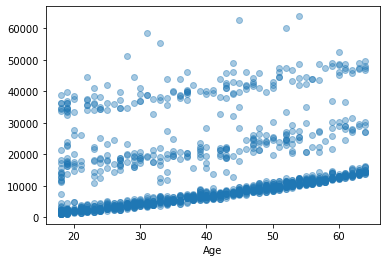

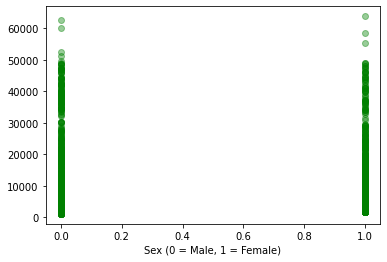

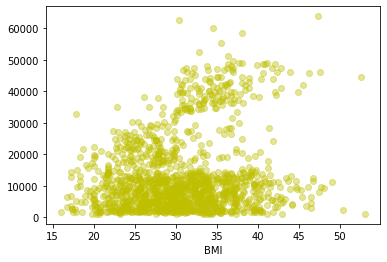

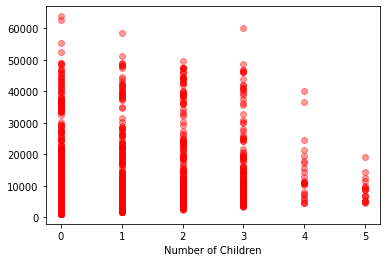

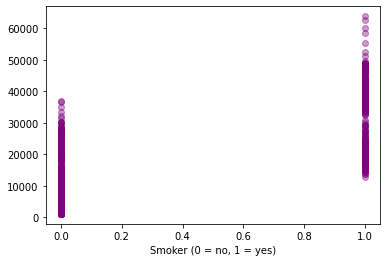

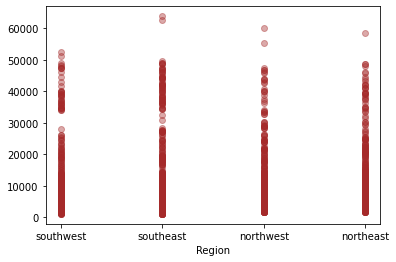

<Figure size 432x288 with 0 Axes>

In [197]:
plt.scatter(df.age, df.charges, alpha = 0.4)
plt.xlabel('Age')
plt.show()
plt.clf()

plt.scatter(df.sex, df.charges, color = 'g', alpha = 0.4)
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.show()
plt.clf()

plt.scatter(df.bmi, df.charges, color = 'y', alpha = 0.4)
plt.xlabel('BMI')
plt.show()
plt.clf()

plt.scatter(df.children, df.charges, color = 'r', alpha = 0.4)
plt.xlabel('Number of Children')
plt.show()
plt.clf()

plt.scatter(df.smoker, df.charges, color = 'purple', alpha = 0.4)
plt.xlabel('Smoker (0 = no, 1 = yes)')
plt.show()
plt.clf()

plt.scatter(df.region, df.charges, color = 'brown', alpha = 0.4)
plt.xlabel('Region')
plt.show()
plt.clf()

With a visual representation of the data we can, at a glance, infer the following:
- There is a slight increase in charges as age increases.
- There appears to be little to no difference between the sexes.
- BMI has a possible correlation but it's hard to tell simply by looking at the graph.
- Number of children may not play as large of a role since the data is fairly evenly distributed.
    - The dropoff with higher numbers of children is likely due to there being less patients with that many children.
- Smoking appears to have a very clear increase in charges and may well be the highest determining factor.
- Region seems fairly evenly distributed, although the high outliers were found everywhere except the southwest.

## Using Machine Learning to Find Relationships

### Standardizing and Normalizing the Data

#### One-Hot Encoding the 'children' and 'region' features

I applied One-Hot Encoding (OHE) to the region column, so that it could be more easily categorized in terms of binary data.

In [198]:
df = pd.get_dummies(df, columns = ['children', 'region'])

charges_col = df.pop('charges')
df = df.assign(charges = charges_col)

#### Normalizing the Remaining Data

In [199]:
from sklearn.preprocessing import StandardScaler

X = df.drop('charges', axis=1)
y = df.charges

scaler = StandardScaler()

df.age = scaler.fit_transform(np.array(df.age).reshape(-1,1))
df.bmi = scaler.fit_transform(np.array(df.bmi).reshape(-1,1))

In [200]:
df.head()

,age,sex,bmi,smoker,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,1,-0.453299,1,1,0,0,0,0,0,0,0,0,1,16884.92
1,-1.509965,0,0.514552,0,0,1,0,0,0,0,0,0,1,0,1725.55
2,-0.797954,0,0.383318,0,0,0,0,1,0,0,0,0,1,0,4449.46
3,-0.441948,0,-1.306321,0,1,0,0,0,0,0,0,1,0,0,21984.47
4,-0.513149,0,-0.289257,0,1,0,0,0,0,0,0,1,0,0,3866.86


#### Splitting the Training and Test Data

In [165]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

#### Implementing Multiple Linear Regression (MLR)

In [166]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train, y_train)

y_predicted = mlr.predict(x_test)

#Printing the training and testing score of the model.
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7386956183377218
0.7983099271662004


##### Testing Accuracy: 79.8%!

#### Visualizing MLR Model

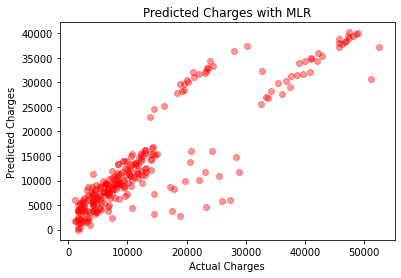

In [179]:
plt.scatter(y_test, y_predicted, alpha = 0.4, color='r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges with MLR')
plt.show()

#### Examining the Coefficients

In [215]:
columns = list(df.columns)
coefficients = list(mlr.coef_)

col_co = list(zip(columns, coefficients))
col_co_sorted = sorted(col_co, key=lambda x: x[1], reverse=True)

col_co_sorted

[('smoker', 23570.311610778754),
 ('age', 3563.1910053397955),
 ('children_4', 2091.0397417370637),
 ('bmi', 2032.69381795301),
 ('children_2', 590.2686793912221),
 ('region_northeast', 490.87676303560437),
 ('region_northwest', 203.52619690529616),
 ('sex', 11.75072732710396),
 ('region_southwest', -269.15169017796796),
 ('children_3', -418.00414301643235),
 ('region_southeast', -425.2512697629371),
 ('children_5', -461.59217180742206),
 ('children_1', -656.7241108569584),
 ('children_0', -1144.9879954474823)]

### Conclusions

Based on the model at large and the coefficients above, a combination of certain features all play a role on whether or not a person's insurance premiums will increase or decrease. The coefficients corroborate the various feature plots from earlier that suggest that _smoking_ plays the largest role in premium increases by far, by a factor that's seven times higher than the next most influential factor of _age_. Having no children seems to decrease your premiums the most, and _sex_ seems to have a comparitavley near-zero effect on premiums.

Further study should try other ML models to find the significance of the other variables in relation to one another, and to see if they can score higher in predicting what a person's premium would be.